In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['TPR','TNR','FPR','FNR','AUC','G-Mean','F1', 'G-Measure']
report = pd.DataFrame(columns = column_names)
columns = ['id',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento',
 'Precio_cat']
columns_test = ['id',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento']

In [3]:
import math

def cmdata_report(cm, classifier, data):# add a df as parameter
    total = cm.sum()
    TP = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TN = cm[1,1]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    ratio = (cm[0,0]+cm[1,1])/total
    PPV = TP/(TP+FP)
    AUC = (1 + TPR - FPR)/2
    GMEAN = math.sqrt(TNR*TPR)
    F1 = 2*TP/(2*TP+FP+FN)
    GMEASURE = math.sqrt(PPV*TPR)
    
    s = pd.Series([TPR,TNR,FPR,FNR,AUC,GMEAN,F1,GMEASURE], name=classifier, index=report.columns)
    df = data.append(s)
    return df

In [4]:
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [5]:
train = pd.read_csv("../csv/train.csv", na_values='?')
test = pd.read_csv("../csv/test.csv", na_values='?')

train = train[columns].copy()
test = test[columns_test].copy()
print(test.shape)

(1159, 10)


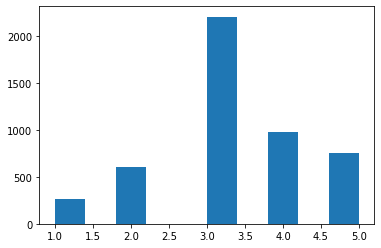

Class: 3, ocurrences: 2211 -> 45.88088815106869%
Class: 4, ocurrences: 978 -> 20.29466694334924%
Class: 5, ocurrences: 759 -> 15.750155633948951%
Class: 2, ocurrences: 602 -> 12.492218302552397%
Class: 1, ocurrences: 269 -> 5.582070969080722%


In [6]:
import matplotlib.pyplot as plt

plt.hist(train['Precio_cat'])
plt.show()

classes = train['Precio_cat'].value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")
    

In [7]:
cols = train.columns.tolist()
print(cols)

['id', 'Año', 'Kilometros', 'Combustible', 'Mano', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos', 'Descuento', 'Precio_cat']


In [8]:
cols = train.columns.tolist()
for i in cols:
    print(i)
    print(train[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012. 2016. 2013. 2017. 2009. 2014. 2011. 2015. 2008. 2010. 2018. 2006.
   nan 2019. 2005. 2007. 2003. 2004. 2001. 1998. 2002. 2000. 1999.]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
['Diesel' 'Petrol' nan 'CNG' 'LPG' 'Electric']
Mano
['First' 'Second' 'Third' nan 'Fourth & Above']
Consumo
['23.4 kmpl' '20.51 kmpl' '25.32 kmpl' '18.5 kmpl' '18.7 kmpl' '17.8 kmpl'
 '16.8 kmpl' '18.6 kmpl' '25.2 kmpl' '10.91 kmpl' '12.99 kmpl' '17.5 kmpl'
 '25.8 kmpl' '18.25 kmpl' '10.0 kmpl' '11.5 kmpl' '19.1 kmpl' '14.21 kmpl'
 '14.16 kmpl' '17.43 kmpl' '18.0 kmpl' '15.7 kmpl' '16.0 kmpl'
 '21.43 kmpl' '21.64 kmpl' '20.73 kmpl' '14.0 kmpl' '17.9 kmpl'
 '28.4 kmpl' '15.96 kmpl' nan '23.65 kmpl' '20.36 kmpl' '21.9 kmpl'
 '22.95 kmpl' '23.59 kmpl' '17.57 kmpl' '21.27 kmpl' '17.3 kmpl'
 '22.32 kmpl' '18.9 kmpl' '24.7 kmpl' '24.0 kmpl' '11.0 kmpl' '13.0 kmpl'
 '16.47 kmpl' '17.21 kmpl' '13.6 kmpl' '26.59 km

In [9]:
train.head()

id     Año  Kilometros Combustible   Mano     Consumo Motor_CC   Potencia  \
0  1.0  2012.0     83000.0      Diesel  First   23.4 kmpl  1248 CC     74 bhp   
1  2.0  2016.0      4800.0      Petrol  First  20.51 kmpl   998 CC  67.04 bhp   
2  3.0  2016.0     26000.0      Diesel  First  25.32 kmpl  1198 CC     77 bhp   
3  4.0  2013.0     56127.0      Petrol  First   18.5 kmpl  1197 CC     80 bhp   
4  5.0  2017.0     41981.0      Petrol  First   18.7 kmpl  1199 CC   88.7 bhp   

   Asientos  Descuento  Precio_cat  
0       5.0        NaN           3  
1       5.0        NaN           3  
2       6.0        NaN           3  
3       5.0        NaN           3  
4       5.0        NaN           3

# Preprocessing data

First of all, we get all numbers from string format

In [10]:
train['Descuento'] = train['Descuento'].fillna(0)
test['Descuento'] = test['Descuento'].fillna(0)

train['Combustible'].fillna(value=train['Combustible'].value_counts().index[0],inplace =True)
train['Mano'].fillna(value=train['Mano'].value_counts().index[0],inplace =True)

In [11]:
train['Combustible'].value_counts(dropna=False)

Diesel      2618
Petrol      2151
CNG           42
LPG            7
Electric       1
Name: Combustible, dtype: int64

In [12]:
import re
import math

for index, row in train.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        train.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        train.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        train.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
for index, row in test.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        test.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        test.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        test.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
train['Consumo'] = train['Consumo'].astype(float)
train['Motor_CC'] = train['Motor_CC'].astype(float)
train['Potencia'] = train['Potencia'].astype(float)

test['Consumo'] = test['Consumo'].astype(float)
test['Motor_CC'] = test['Motor_CC'].astype(float)
test['Potencia'] = test['Potencia'].astype(float)

train.head()

id     Año  Kilometros Combustible   Mano  Consumo  Motor_CC  Potencia  \
0  1.0  2012.0     83000.0      Diesel  First    23.40    1248.0      74.0   
1  2.0  2016.0      4800.0      Petrol  First    20.51     998.0      67.0   
2  3.0  2016.0     26000.0      Diesel  First    25.32    1198.0      77.0   
3  4.0  2013.0     56127.0      Petrol  First    18.50    1197.0      80.0   
4  5.0  2017.0     41981.0      Petrol  First    18.70    1199.0      88.0   

   Asientos  Descuento  Precio_cat  
0       5.0        0.0           3  
1       5.0        0.0           3  
2       6.0        0.0           3  
3       5.0        0.0           3  
4       5.0        0.0           3

In [13]:
#train.Descuento = train.Descuento.fillna(0)
#test.Descuento = test.Descuento.fillna(0)

In [14]:
from sklearn import preprocessing
le_combustible = preprocessing.LabelEncoder()
le_mano = preprocessing.LabelEncoder()

data = train.copy()
#data_without_nan = data_without_nan.dropna()
data['Combustible'] = le_combustible.fit_transform(data['Combustible'])
data['Mano'] = le_mano.fit_transform(data['Mano'])
#imputer_num = SimpleImputer(missing_values=np.NaN, strategy='mean')
#data_without_nan.Año = imputer_num.fit_transform(data_without_nan.Año.values.reshape(-1,1))[:,0]
#data_without_nan.Año = imputer_num.fit_transform(data_without_nan.Año.values.reshape(-1,1))[:,0]
cols1 = data.select_dtypes([np.number]).columns
cols2 = data.select_dtypes(exclude = [np.number]).columns
data[cols1] = data[cols1].fillna(data[cols1].mean())
data[cols2] = data[cols2].fillna(data[cols2].mode().iloc[0])

test['Combustible'] = le_combustible.fit_transform(test['Combustible'])
test['Mano'] = le_mano.fit_transform(test['Mano'])

In [15]:
data.head()

id     Año  Kilometros  Combustible  Mano  Consumo  Motor_CC  Potencia  \
0  1.0  2012.0     83000.0            1     0    23.40    1248.0      74.0   
1  2.0  2016.0      4800.0            4     0    20.51     998.0      67.0   
2  3.0  2016.0     26000.0            1     0    25.32    1198.0      77.0   
3  4.0  2013.0     56127.0            4     0    18.50    1197.0      80.0   
4  5.0  2017.0     41981.0            4     0    18.70    1199.0      88.0   

   Asientos  Descuento  Precio_cat  
0       5.0        0.0           3  
1       5.0        0.0           3  
2       6.0        0.0           3  
3       5.0        0.0           3  
4       5.0        0.0           3

In [16]:
cols = data.columns.tolist()
for i in cols:
    print(i)
    print(data[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012.         2016.         2013.         2017.         2009.
 2014.         2011.         2015.         2008.         2010.
 2018.         2006.         2013.57109754 2019.         2005.
 2007.         2003.         2004.         2001.         1998.
 2002.         2000.         1999.        ]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
[1 4 0 3 2]
Mano
[0 2 3 1]
Consumo
[23.4        20.51       25.32       18.5        18.7        17.8
 16.8        18.6        25.2        10.91       12.99       17.5
 25.8        18.25       10.         11.5        19.1        14.21
 14.16       17.43       18.         15.7        16.         21.43
 21.64       20.73       14.         17.9        28.4        15.96
 18.25417615 23.65       20.36       21.9        22.95       23.59
 17.57       21.27       17.3        22.32       18.9        24.7
 24.         11.         13.         16.47       17.21     

# erase all missing data

In [17]:
#data_without_nan = data_without_nan.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
test_id = test.id
#test = test.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
#target = data.Precio_cat
data = data.drop('id', axis=1)
test = test.drop('id', axis=1)

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
data, data['Precio_cat'] = oversample.fit_resample(data, data['Precio_cat'])

X = data.drop('Precio_cat', axis=1)
y = data['Precio_cat']

target = y

Oversampling

In [18]:
X.shape

(11055, 9)

In [19]:
y.shape

(11055,)

In [20]:
X.shape

(11055, 9)

In [21]:
y.shape

(11055,)

Now, train the model

In [22]:
import random
# get random seed parameter for classifiers
random_seed = random.randrange(2**32 - 1)
seed = random_seed
# seed used in first kaggle submission
seed = 2232527064
print("random_seed: "+str(random_seed))
from sklearn.model_selection import StratifiedKFold
cv_ = StratifiedKFold(n_splits=5, shuffle=True)
print("Actual seed: "+str(seed))

random_seed: 908486803
Actual seed: 2232527064


Model tuning

In [23]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}
params['eval_metric'] = "mae"
num_boost_round = 999

In [24]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

dtrain = xgb.DMatrix(X, label=y)

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=seed,
    nfold=5,
    metrics=params['eval_metric'],
    early_stopping_rounds=10
)

print(cv_results)
print(cv_results['test-mae-mean'].min())

'''#model = RandomForestClassifier(random_state=random_seed)
model = XGBClassifier()
#model.fit(X, y)
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=cv_, n_jobs=-1)

from sklearn.metrics import classification_report, confusion_matrix
rf_cmatrix = confusion_matrix(y, y_pred)
rf_report = get_classification_report(y, y_pred)
report = cmdata_report(rf_cmatrix, 'Random Forest', report)'''

     train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0          1.754827       0.007581       1.755621      0.031935
1          1.243317       0.005464       1.246973      0.024759
2          0.897087       0.003450       0.903719      0.018745
3          0.665282       0.002221       0.675624      0.014796
4          0.513298       0.002309       0.527808      0.011042
..              ...            ...            ...           ...
274        0.080040       0.001636       0.226604      0.003947
275        0.079747       0.001659       0.226613      0.003891
276        0.079493       0.001661       0.226523      0.003860
277        0.079245       0.001577       0.226477      0.003833
278        0.079084       0.001565       0.226428      0.003871

[279 rows x 4 columns]
0.2264278


"#model = RandomForestClassifier(random_state=random_seed)\nmodel = XGBClassifier()\n#model.fit(X, y)\nfrom sklearn.model_selection import cross_val_predict\ny_pred = cross_val_predict(model, X, y, cv=cv_, n_jobs=-1)\n\nfrom sklearn.metrics import classification_report, confusion_matrix\nrf_cmatrix = confusion_matrix(y, y_pred)\nrf_report = get_classification_report(y, y_pred)\nreport = cmdata_report(rf_cmatrix, 'Random Forest', report)"

In [25]:
'''gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,20)
    for min_child_weight in range(2,4)
]

min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=seed,
        nfold=5,
        metrics=params['eval_metric'],
        early_stopping_rounds=10
    )    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
        
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]
# Best params: 11, 6, MAE: 0.2130952 range(9,12) y range(5,8)
# Best params: 16, 2, MAE: 0.20072779999999998 range(3,20) y range(2,12)
# Best params: 19, 2, MAE: 0.20194359999999997'''

'gridsearch_params = [\n    (max_depth, min_child_weight)\n    for max_depth in range(3,20)\n    for min_child_weight in range(2,4)\n]\n\nmin_mae = float("Inf")\nbest_params = None\nfor max_depth, min_child_weight in gridsearch_params:\n    print("CV with max_depth={}, min_child_weight={}".format(\n                             max_depth,\n                             min_child_weight))    # Update our parameters\n    params[\'max_depth\'] = max_depth\n    params[\'min_child_weight\'] = min_child_weight    # Run CV\n    cv_results = xgb.cv(\n        params,\n        dtrain,\n        num_boost_round=num_boost_round,\n        seed=seed,\n        nfold=5,\n        metrics=params[\'eval_metric\'],\n        early_stopping_rounds=10\n    )    # Update best MAE\n    mean_mae = cv_results[\'test-mae-mean\'].min()\n    boost_rounds = cv_results[\'test-mae-mean\'].argmin()\n    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))\n    if mean_mae < min_mae:\n        min_mae = mean_mae\n

In [26]:
params

{'max_depth': 6,
 'min_child_weight': 1,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'eval_metric': 'mae'}

In [27]:
''''gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(3,11)] # change to (7,11)
    for colsample in [i/10. for i in range(3,11)]
]

min_mae = float("Inf")
best_params = None# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=seed,
        nfold=5,
        metrics=params['eval_metric'],
        early_stopping_rounds=10
    )    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

# Best params: 1.0, 1.0, MAE: 0.20072799999999996 range(3,11)'''

'\'gridsearch_params = [\n    (subsample, colsample)\n    for subsample in [i/10. for i in range(3,11)] # change to (7,11)\n    for colsample in [i/10. for i in range(3,11)]\n]\n\nmin_mae = float("Inf")\nbest_params = None# We start by the largest values and go down to the smallest\nfor subsample, colsample in reversed(gridsearch_params):\n    print("CV with subsample={}, colsample={}".format(\n                             subsample,\n                             colsample))    # We update our parameters\n    params[\'subsample\'] = subsample\n    params[\'colsample_bytree\'] = colsample    # Run CV\n    cv_results = xgb.cv(\n        params,\n        dtrain,\n        num_boost_round=num_boost_round,\n        seed=seed,\n        nfold=5,\n        metrics=params[\'eval_metric\'],\n        early_stopping_rounds=10\n    )    # Update best score\n    mean_mae = cv_results[\'test-mae-mean\'].min()\n    boost_rounds = cv_results[\'test-mae-mean\'].argmin()\n    print("\tMAE {} for {} rounds".

In [28]:
'''min_mae = float("Inf")
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))    # We update our parameters
    params['eta'] = eta    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=seed,
            nfold=5,
            metrics=params['eval_metric'],
            early_stopping_rounds=10
          )    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))
params['eta'] = best_params'''

'min_mae = float("Inf")\nbest_params = None \nfor eta in [.3, .2, .1, .05, .01, .005]:\n    print("CV with eta={}".format(eta))    # We update our parameters\n    params[\'eta\'] = eta    # Run and time CV\n    cv_results = xgb.cv(\n            params,\n            dtrain,\n            num_boost_round=num_boost_round,\n            seed=seed,\n            nfold=5,\n            metrics=params[\'eval_metric\'],\n            early_stopping_rounds=10\n          )    # Update best score\n    mean_mae = cv_results[\'test-mae-mean\'].min()\n    boost_rounds = cv_results[\'test-mae-mean\'].argmin()\n    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))\n    if mean_mae < min_mae:\n        min_mae = mean_mae\n        best_params = eta\nprint("Best params: {}, MAE: {}".format(best_params, min_mae))\nparams[\'eta\'] = best_params'

In [29]:
#params

params = {'max_depth': 11,
 'min_child_weight': 6,
 'eta': 0.05,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'eval_metric': 'mae'}


In [30]:
cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=seed,
            nfold=5,
            metrics=params['eval_metric'],
            early_stopping_rounds=10
          ) 
#cv_results
rounds = cv_results.shape[0] - 1
model = xgb.train(params, dtrain, rounds)
xpreds_proba = model.predict(xgb.DMatrix(test))
#predictions = np.round(np.argmax(xpreds_proba, axis=0)).astype(int) + 1
#predictions = model.predict(test)

AxisError: axis 1 is out of bounds for array of dimension 1

In [36]:
for i in range(len(xpreds_proba)):
    xpreds_proba[i] = int(xpreds_proba[i])

In [38]:
prediction = xpreds_proba

In [39]:
submit = pd.DataFrame(columns = ['id', 'Precio_cat'])
submit['Precio_cat'] = prediction.tolist()
submit['id'] = test_id.tolist()

In [ ]:
a

In [ ]:
#cv_results['train-mae-mean'].min()
#num_boost_round = cv_results['train-mae-mean'].idxmin() + 1

In [ ]:
#boost = xgb.train(params, dtrain, num_boost_round=num_boost_round)
# make prediction
#dtest = xgb.DMatrix(test)
#preds = boost.predict(dtest)

In [ ]:
params

In [ ]:
from xgboost.sklearn import XGBClassifier  
model = XGBClassifier(
    max_depth=params['max_depth'],
    #learning_rate=params['eta'],
    njobs=-1,
    min_child_weight=params['min_child_weight'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'],
    random_state=seed
)
model.fit(X, y)
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=cv_, n_jobs=-1)

from sklearn.metrics import classification_report, confusion_matrix
rf_cmatrix = confusion_matrix(y, y_pred)
rf_report = get_classification_report(y, y_pred)
report = cmdata_report(rf_cmatrix, 'Random Forest', report)

In [ ]:
cols = X.columns.tolist()
for i in cols:
    print(i)
    print(X[i].unique())

In [ ]:
report

In [ ]:
rf_report

And get the prediction

In [ ]:
target.head()

In [ ]:
model.fit(X, target)
prediction = model.predict(test)

In [ ]:
prediction

In [ ]:
test_id

Get csv submission

In [ ]:
submit = pd.DataFrame(columns = ['id', 'Precio_cat'])
submit['Precio_cat'] = prediction.tolist()
submit['id'] = test_id.tolist()

In [40]:
submit

id  Precio_cat
0     4820         5.0
1     4821         2.0
2     4822         1.0
3     4823         2.0
4     4824         1.0
...    ...         ...
1154  5974         1.0
1155  5975         2.0
1156  5976         4.0
1157  5977         5.0
1158  5978         5.0

[1159 rows x 2 columns]

In [ ]:
submit.to_csv('submission.csv', index=False)

In [ ]:
test.columns.tolist()